In [16]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\All_Docs\Masters\CS 584 Machine Learning\Project\Data\cleaned2.csv")

In [3]:
df.head()

,Unnamed: 0,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,clean,other,2,other,south
1,1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,clean,automatic,2,sedan,south
2,2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,clean,automatic,2,SUV,south
3,5,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,clean,other,4,pickup,south
4,6,39990,2012.0,ford,good,8 cylinders,gas,9692.0,clean,other,2,coupe,south


In [4]:
df["price"]=np.log1p(df["price"])

## Encoding

### For Numerical Data

#### year

In [5]:
year_min = df["year"].min()
year_max = df["year"].max()
df["year"] = ((df["year"] - year_min) / (year_max - year_min))

#### odometer

In [6]:
odo_min = df["odometer"].min()
odo_max = df["odometer"].max()
df["odometer"] = ((df["odometer"] - odo_min) / (odo_max - odo_min))

### For Ordinal Data

#### cylinders

In [7]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(list(df['cylinders'].astype(str).values))
df['cylinders'] = label_encoder.transform(list(df['cylinders'].astype(str).values))

In [8]:
#Normalizing Cylinder
cyl_min = df["cylinders"].min()
cyl_max = df["cylinders"].max()
df["cylinders"] = ((df["cylinders"] - cyl_min) / (cyl_max - cyl_min))

### OneHotEncoding

In [9]:
train_df = pd.get_dummies(df)

In [10]:
len(train_df)

318824

In [11]:
train_df.head()

,Unnamed: 0,price,year,cylinders,odometer,drive,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_midwest,state_northeast,state_south,state_west
0,0,10.491024,0.583333,0.857143,0.130950,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,8.922792,0.750000,0.428571,0.374431,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,8.497195,0.416667,0.714286,0.348210,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,10.295226,0.833333,0.714286,0.133143,4,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,6,10.596410,0.666667,0.857143,0.038732,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting the Data into test and train

In [12]:
y = train_df["price"]
x = train_df.drop(['price', 'Unnamed: 0'], axis=1)
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.head()

,year,cylinders,odometer,drive,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_midwest,state_northeast,state_south,state_west
220052,0.958333,0.714286,0.040324,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10665,0.333333,0.428571,0.273475,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102772,0.750000,0.428571,0.308018,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
90016,0.791667,0.428571,0.528394,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
294161,0.708333,1.000000,0.386033,4,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### GradientBoosting Model

#### Creating Model

In [14]:
gradientBoosting = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=8, learning_rate=0.1)
gradientBoostingModel = gradientBoosting.fit(x_train, y_train)

In [80]:
gradientBoosting_dict = {}
for lr in [0.001, 0.01, 0.1, 0.05, 0.3]:
    for md in [5, 6, 7, 8]:
        gradientBoosting = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=md, learning_rate=lr, min_samples_split=1595, max_features='sqrt', subsample=0.8)
        gradientBoostingModel = gradientBoosting.fit(x_train, y_train)
        y_pred = gradientBoostingModel.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse_test = math.sqrt(mse)
        y_bar = np.sum(y_test) / len(y_test)
        sse = np.sum((y_test - y_pred)**2)  
        sst = np.sum((y_test - y_bar)**2) 
        rsq_test = 1 - (sse / sst)
        print(rmse_test, rsq_test)
        gradientBoosting_dict[f'{lr}_{md}'] = [rmse_test, rsq_test]

0.6100046774188883 0.29791273943422747
0.5991392250905088 0.32270125746069844
0.5867926360295577 0.35032811530286
0.5787021739572524 0.3681194460214118
0.3483431176981961 0.7710507466581853
0.3350690060315458 0.7881671656190052
0.32398345438823284 0.8019520160340856
0.31654538549478967 0.8109412699474234
0.2862577624753176 0.8453893851846925
0.2805634989691605 0.8514792612631964
0.27626413024005675 0.8559962627371114
0.2730276751353328 0.8593505285015391
0.29709684293062705 0.8334591272496037
0.2899789536535505 0.8413435547963937
0.28320707294574204 0.8486672397876914
0.2787026037296783 0.8534429162499557
0.2786271235691766 0.8535222886999575
0.27452620920314336 0.8578023599279889
0.2702973540063323 0.8621494982491852
0.26714537895399726 0.8653457408003151


In [81]:
gradientBoosting_dict

{'0.001_5': [0.6100046774188883, 0.29791273943422747],
 '0.001_6': [0.5991392250905088, 0.32270125746069844],
 '0.001_7': [0.5867926360295577, 0.35032811530286],
 '0.001_8': [0.5787021739572524, 0.3681194460214118],
 '0.01_5': [0.3483431176981961, 0.7710507466581853],
 '0.01_6': [0.3350690060315458, 0.7881671656190052],
 '0.01_7': [0.32398345438823284, 0.8019520160340856],
 '0.01_8': [0.31654538549478967, 0.8109412699474234],
 '0.1_5': [0.2862577624753176, 0.8453893851846925],
 '0.1_6': [0.2805634989691605, 0.8514792612631964],
 '0.1_7': [0.27626413024005675, 0.8559962627371114],
 '0.1_8': [0.2730276751353328, 0.8593505285015391],
 '0.05_5': [0.29709684293062705, 0.8334591272496037],
 '0.05_6': [0.2899789536535505, 0.8413435547963937],
 '0.05_7': [0.28320707294574204, 0.8486672397876914],
 '0.05_8': [0.2787026037296783, 0.8534429162499557],
 '0.3_5': [0.2786271235691766, 0.8535222886999575],
 '0.3_6': [0.27452620920314336, 0.8578023599279889],
 '0.3_7': [0.2702973540063323, 0.862149498

In [98]:
gradien_Boost_Parameter_tuning = pd.DataFrame()
for i in gradientBoosting_dict:
    gradien_Boost_Parameter_tuning = gradien_Boost_Parameter_tuning.append(pd.Series([*i.split('_'), *gradientBoosting_dict[i]]), ignore_index=True)
gradien_Boost_Parameter_tuning.columns=['learning_rate', 'maximum_depth', 'rmse_test', 'r2_test']
gradien_Boost_Parameter_tuning.head()

,learning_rate,maximum_depth,rmse_test,r2_test
0,0.001,5,0.610005,0.297913
1,0.001,6,0.599139,0.322701
2,0.001,7,0.586793,0.350328
3,0.001,8,0.578702,0.368119
4,0.01,5,0.348343,0.771051


In [103]:
gradien_Boost_Parameter_tuning.to_csv('gradien_Boost_Parameter_tuning.csv')

In [14]:
gradien_Boost_Parameter_tuning = pd.read_csv(r"D:\All_Docs\Masters\CS 584 Machine Learning\Project\HyperParameterTuning\gradien_Boost_Parameter_tuning.csv")

In [32]:
temp_df = gradien_Boost_Parameter_tuning.groupby(by='learning_rate').mean()

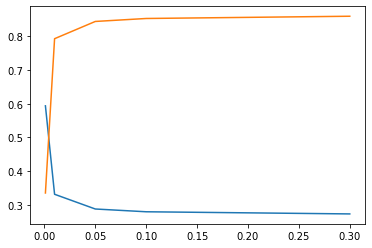

In [33]:
plt.plot(temp_df.index, temp_df['rmse_test'])
plt.plot(temp_df.index, temp_df['r2_test'])
plt.show()

In [27]:
temp_df = gradien_Boost_Parameter_tuning.groupby(by='maximum_depth').mean()

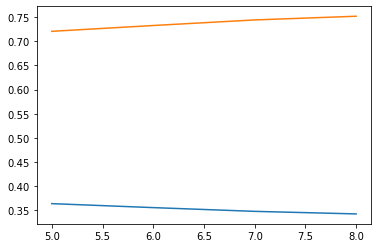

In [31]:
plt.plot(temp_df.index, temp_df['rmse_test'])
plt.plot(temp_df.index, temp_df['r2_test'])
plt.show()

#### Predicting

In [17]:
y_pred = gradientBoostingModel.predict(x_test)

#### MSE and RMSE

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
rmse
print("rmse (Test)={}".format(rmse))

rmse (Test)=0.25079832310642053


#### RSquared

In [20]:
# acc_test_rmse.insert(0,rmse)
y_bar = np.sum(y_test) / len(y_test)
sse = np.sum((y_test - y_pred)**2)  
sst = np.sum((y_test - y_bar)**2) 
rsq = 1 - (sse / sst)
print("r2 (Test)={}".format(rsq))
# acc_test_r2.insert(0,rsq)

r2 (Test)=0.8813209614561743


#### Feature Importance

In [53]:
feature_imp = pd.DataFrame(gradientBoostingModel.feature_importances_,index=x_train.columns)
feature_imp.reset_index(inplace=True)
feature_imp.columns = ["columns", "value"]
feature_imp_dict = {}
column_list = ['year','odometer', 'manufacturer','condition','cylinders','fuel','title_status','transmission','drive','type','state']
for col in column_list:
    feature_imp_dict[col] = feature_imp[feature_imp["columns"].str.startswith(col)]["value"].sum()


In [77]:
sum(feature_imp_dict.values())

1.0

In [56]:
for i in feature_imp_dict:
    print(i, feature_imp_dict[i])

year 0.4947547533307803
odometer 0.14278911499142277
manufacturer 0.06284271964272206
condition 0.009672968951095299
cylinders 0.09270197882577601
fuel 0.05155119087463463
title_status 0.005515143864228453
transmission 0.0056861863460786425
drive 0.0599168838204484
type 0.06400262166031737
state 0.010566437692496254


In [64]:
pickle.dump(gradientBoostingModel, open('GradienBoostingModel.pkl','wb'))

### RandomForest

In [67]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0,n_jobs=-1)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=0)

In [72]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

# Metrics
from sklearn import metrics

print('rmse (Test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("r2 (Test):{}".format(regressor.score(x_test, y_test)))

print('rmse (Train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("r2 (Train):{}".format(regressor.score(x_train, y_train)))


rmse (Test): 0.23735193205934563
r2 (Test):0.8937056195219538
rmse (Train): 0.0944379846368207
r2 (Train):0.9832802431067738


In [16]:
random_forest_dict = {}
for md in [5, 6, 7, 8]:
    for n_est in range(200, 1200, 100):
        for mf in ['auto', 'sqrt']:
            for msp in  [2, 5, 10]:
                regressor = RandomForestRegressor(n_estimators=n_est, random_state=0, n_jobs=-1, max_depth=md, max_features=mf, min_samples_split=msp)
                regressor.fit(x_train,y_train)
                y_pred_test = regressor.predict(x_test)
                y_pred_train = regressor.predict(x_train)
                rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
                r2_test = regressor.score(x_test, y_test)
                rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                r2_train = regressor.score(x_train, y_train)
                print(rmse_test, r2_test, rmse_train, r2_train)
                random_forest_dict[f'{md}_{n_est}_{mf}_{msp}'] = [rmse_test, r2_test, rmse_train, r2_train]

0.42524629619678006 0.6588024987797586 0.42382612986836204 0.6632465958379252
0.42524629619678006 0.6588024987797586 0.42382612986836204 0.6632465958379252
0.42524629619678 0.6588024987797587 0.42382612986836204 0.6632465958379253
0.49012751121676823 0.5467446661953186 0.48977388085185986 0.5502949345072194
0.49058382363005537 0.5459003050494197 0.4902275487346051 0.5494614428032125
0.48942620974085954 0.5480408236861929 0.4890492385906107 0.55162466740961
0.4251998557967101 0.658877017868484 0.4237684531396611 0.6633382443313804
0.42519985579671005 0.658877017868484 0.42376845313966116 0.6633382443313804
0.42519985579671005 0.6588770178684841 0.4237684531396611 0.6633382443313804
0.48609818911377456 0.5541664275488816 0.4857018069749786 0.5577417164321621
0.486289691798032 0.5538150781896677 0.48587979567370465 0.5574175199871605
0.485470180215883 0.5553176623959983 0.4850330708341684 0.5589587203212306
0.4253084141910714 0.6587028104221186 0.4238845165368111 0.6631538065439514
0.4253

0.39927998784187957 0.6991986023679495 0.3971627326213527 0.7042848886892368
0.3992798773806098 0.6991987688020347 0.39716289760158774 0.7042846430108047
0.39927972608813894 0.6991989967571882 0.39716469916897534 0.7042819602206718
0.4597015688692024 0.6012719999613233 0.45870831398323814 0.6055338321427932
0.4606153056532857 0.5996853422154843 0.45966194624452655 0.6038919753129733
0.4607117236284991 0.5995177335060975 0.4597595253190142 0.6037237823296064
0.3992319288778029 0.6992710093705514 0.3971158554351761 0.7043546911812899
0.3992318439298719 0.6992711373478047 0.39711603307656446 0.7043544266798647
0.3992317003293644 0.6992713536873085 0.39711794451559534 0.7043515806107006
0.45847209190769156 0.6034019528023584 0.4574642831948367 0.6076705391010417
0.4593184206435847 0.6019363799440149 0.45835032193808695 0.6061493023272684
0.4594610027811277 0.6016892068783457 0.45848196286892956 0.6059230373271697
0.37898613170601353 0.7289986847356292 0.3763999940841439 0.7343953013970473


0.42072887702629463 0.6660131214739571 0.4185444983910393 0.6715873985430905
0.36325329143926477 0.7510318003611565 0.3590015980025695 0.7583819910935407
0.3632529767621097 0.7510322317107005 0.35900879179285533 0.7583723077566985
0.3632570066207517 0.7510267076790089 0.3590278782398546 0.7583466151450472
0.41949304755551653 0.6679723149226677 0.4173024696525889 0.673533632088893
0.41990458313089585 0.6673205366401537 0.41768160667915677 0.6729401454711281
0.4196293066725119 0.667756582399148 0.41744349166636724 0.6733129445678856
0.3632848907173265 0.7509884831621799 0.35903865322357775 0.7583321101412942
0.36328496585150394 0.7509883801615989 0.3590456838445114 0.758322645466972
0.36328848132093833 0.7509835608211021 0.35906489918822365 0.7582967766825256
0.4188968883198553 0.6689153613960133 0.4166769234687258 0.6745116599718803
0.41915405415041185 0.6685087229424823 0.4169244418358648 0.674124845791858
0.418114671641099 0.6701506922554703 0.4159299415579378 0.6756776279144474
0.363

In [99]:
for i in random_forest_dict:
    print(i)

5_200_auto_2
5_200_auto_5
5_200_auto_10
5_200_sqrt_2
5_200_sqrt_5
5_200_sqrt_10
5_300_auto_2
5_300_auto_5
5_300_auto_10
5_300_sqrt_2
5_300_sqrt_5
5_300_sqrt_10
5_400_auto_2
5_400_auto_5
5_400_auto_10
5_400_sqrt_2
5_400_sqrt_5
5_400_sqrt_10
5_500_auto_2
5_500_auto_5
5_500_auto_10
5_500_sqrt_2
5_500_sqrt_5
5_500_sqrt_10
5_600_auto_2
5_600_auto_5
5_600_auto_10
5_600_sqrt_2
5_600_sqrt_5
5_600_sqrt_10
5_700_auto_2
5_700_auto_5
5_700_auto_10
5_700_sqrt_2
5_700_sqrt_5
5_700_sqrt_10
5_800_auto_2
5_800_auto_5
5_800_auto_10
5_800_sqrt_2
5_800_sqrt_5
5_800_sqrt_10
5_900_auto_2
5_900_auto_5
5_900_auto_10
5_900_sqrt_2
5_900_sqrt_5
5_900_sqrt_10
5_1000_auto_2
5_1000_auto_5
5_1000_auto_10
5_1000_sqrt_2
5_1000_sqrt_5
5_1000_sqrt_10
5_1100_auto_2
5_1100_auto_5
5_1100_auto_10
5_1100_sqrt_2
5_1100_sqrt_5
5_1100_sqrt_10
6_200_auto_2
6_200_auto_5
6_200_auto_10
6_200_sqrt_2
6_200_sqrt_5
6_200_sqrt_10
6_300_auto_2
6_300_auto_5
6_300_auto_10
6_300_sqrt_2
6_300_sqrt_5
6_300_sqrt_10
6_400_auto_2
6_400_auto_5
6_

In [17]:
randomForest_Parameter_tuning = pd.DataFrame()
for i in random_forest_dict:
    randomForest_Parameter_tuning = randomForest_Parameter_tuning.append(pd.Series([*i.split('_'), *random_forest_dict[i]]), ignore_index=True)
randomForest_Parameter_tuning.columns=['n_estimators', 'max_depth', 'max_features', 'min_samples_split', 'rmse_test', 'r2_test', 'rmse_train', 'r2_train']
randomForest_Parameter_tuning.head()

,n_estimators,max_depth,max_features,min_samples_split,rmse_test,r2_test,r2_train,r2_train
0,5,200,auto,2,0.425246,0.658802,0.423826,0.663247
1,5,200,auto,5,0.425246,0.658802,0.423826,0.663247
2,5,200,auto,10,0.425246,0.658802,0.423826,0.663247
3,5,200,sqrt,2,0.490128,0.546745,0.489774,0.550295
4,5,200,sqrt,5,0.490584,0.545900,0.490228,0.549461


In [18]:
randomForest_Parameter_tuning.to_csv('randomForest_Parameter_tuning.csv')

In [34]:
randomForest_Parameter_tuning = pd.read_csv(r"D:\All_Docs\Masters\CS 584 Machine Learning\Project\HyperParameterTuning\randomForest_Parameter_tuning.csv")

In [35]:
randomForest_Parameter_tuning

,Unnamed: 0,n_estimators,max_depth,max_features,min_samples_split,rmse_test,r2_test,r2_train,r2_train.1
0,0,5,200,auto,2,0.425246,0.658802,0.663247,0.663247
1,1,5,200,auto,5,0.425246,0.658802,0.663247,0.663247
2,2,5,200,auto,10,0.425246,0.658802,0.663247,0.663247
3,3,5,200,sqrt,2,0.490128,0.546745,0.550295,0.550295
4,4,5,200,sqrt,5,0.490584,0.545900,0.549461,0.549461
...,...,...,...,...,...,...,...,...,...
235,235,8,1100,auto,5,0.363293,0.750978,0.758322,0.758322
236,236,8,1100,auto,10,0.363295,0.750974,0.758296,0.758296
237,237,8,1100,sqrt,2,0.418421,0.669667,0.675268,0.675268
238,238,8,1100,sqrt,5,0.418111,0.670156,0.675772,0.675772


In [36]:
temp_df = randomForest_Parameter_tuning.groupby(by='n_estimators').mean()

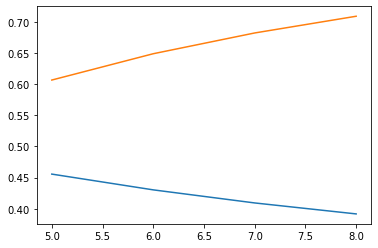

In [37]:
plt.plot(temp_df.index, temp_df['rmse_test'])
plt.plot(temp_df.index, temp_df['r2_test'])
plt.show()

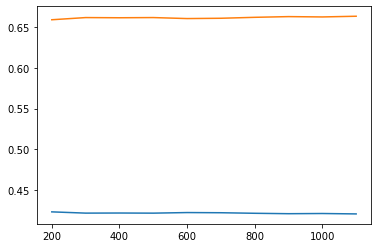

In [38]:
temp_df = randomForest_Parameter_tuning.groupby(by='max_depth').mean()
plt.plot(temp_df.index, temp_df['rmse_test'])
plt.plot(temp_df.index, temp_df['r2_test'])
plt.show()

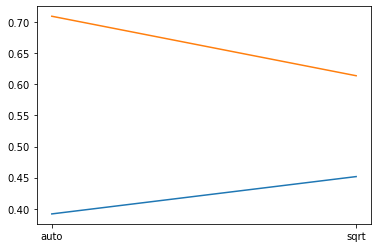

In [40]:
temp_df = randomForest_Parameter_tuning.groupby(by='max_features').mean()
plt.plot(temp_df.index, temp_df['rmse_test'])
plt.plot(temp_df.index, temp_df['r2_test'])
plt.show()

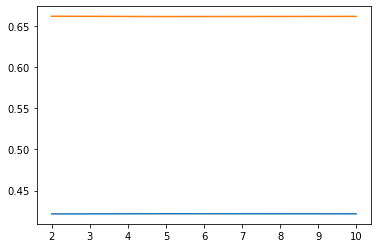

In [41]:
temp_df = randomForest_Parameter_tuning.groupby(by='min_samples_split').mean()
plt.plot(temp_df.index, temp_df['rmse_test'])
plt.plot(temp_df.index, temp_df['r2_test'])
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a tuple

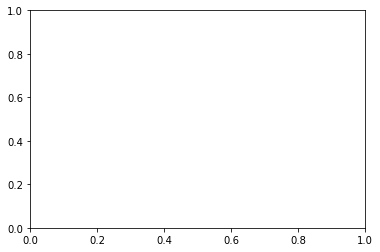

In [42]:
temp_df = randomForest_Parameter_tuning.groupby(by=['max_features', 'n_estimators']).mean()
plt.plot(temp_df.index, temp_df['rmse_test'])
plt.plot(temp_df.index, temp_df['r2_test'])
plt.show()

In [45]:
temp_df = randomForest_Parameter_tuning.groupby(by=['max_features', 'n_estimators']).mean()


In [46]:
temp_df

Unnamed: 0  max_depth  min_samples_split  \
max_features n_estimators                                             
auto         5                   28.0      650.0           5.666667   
             6                   88.0      650.0           5.666667   
             7                  148.0      650.0           5.666667   
             8                  208.0      650.0           5.666667   
sqrt         5                   31.0      650.0           5.666667   
             6                   91.0      650.0           5.666667   
             7                  151.0      650.0           5.666667   
             8                  211.0      650.0           5.666667   

                           rmse_test   r2_test  r2_train  r2_train.1  
max_features n_estimators                                             
auto         5              0.425001  0.659196  0.663672    0.663672  
             6              0.399313  0.699150  0.704224    0.704224  
             7              0.378926  0.729084  0.734444    0.734444  
             8              0.363341  0.750912  0.758244    0.758244  
sqrt         5              0.486136  0.554091  0.557750    0.557750  
             6              0.461189  0.598683  0.602858    0.602858  
             7              0.439549  0.635462  0.640225    0.640225  
             8              0.419886  0.667346  0.672967    0.672967

In [19]:
parameters={'alpha': uniform()}
tuningModel = Lasso()
rand_search = RandomizedSearchCV(estimator=tuningModel,param_distributions=parameters,n_iter=50)
rand_search.fit(x_train,y_train)
print(rand_search.best_estimator_.alpha)
# print(rand_search.best_score_)

0.015495869699106657


In [20]:
lassoRegressor=Lasso(alpha=rand_search.best_estimator_.alpha)
lassoRegressor.fit(x_train,y_train)
lassoTrainPrediction=lassoRegressor.predict(x_train)
lassoTestPrediction=lassoRegressor.predict(x_test)
testRmse=math.sqrt(mean_squared_error(y_test,lassoTestPrediction))
trainRmse=math.sqrt(mean_squared_error(y_train,lassoTrainPrediction))
print("Test RMSE {0}".format(testRmse))
print("Test R-Squared {0}".format(lassoRegressor.score(x_test, y_test)))
print("Train RMSE {0}".format(trainRmse))
print("Train R-Squared {0}".format(lassoRegressor.score(x_train,y_train)))

Test RMSE 0.4283768245482041
Test R-Squared 0.6537604322313855
Train RMSE 0.4268502598093764
Train R-Squared 0.6584237723767361


In [21]:
resultDict=dict()
resultDict['lassoRegressorBestAlpha']=rand_search.best_estimator_.alpha
resultDict['lassoRegressorTestRMSE']=testRmse
resultDict['lassoRegressorTestRSquared']=lassoRegressor.score(x_test, y_test)
resultDict['lassoRegressorTrainRMSE']=trainRmse
resultDict['lassoRegressorTrainRSquared']=lassoRegressor.score(x_train,y_train)

In [22]:
resultDict

{'lassoRegressorBestAlpha': 0.015495869699106657,
 'lassoRegressorTestRMSE': 0.4283768245482041,
 'lassoRegressorTestRSquared': 0.6537604322313855,
 'lassoRegressorTrainRMSE': 0.4268502598093764,
 'lassoRegressorTrainRSquared': 0.6584237723767361}

In [30]:
column_drop_values = {}
for i in df.columns:
    if str(type(df[i][0]))[8:11] == 'str':
        column_drop_values[i] = list(df[i].unique())
column_drop_values['cylinders'] = list(df['cylinders'].unique())

In [32]:
column_drop_values['drive'] = list(df['drive'].unique())

In [33]:
column_drop_values

{'manufacturer': ['chevrolet',
  'hyundai',
  'bmw',
  'toyota',
  'ford',
  'jeep',
  'ram',
  'unknown',
  'honda',
  'dodge',
  'lexus',
  'mercedes-benz',
  'cadillac',
  'gmc',
  'subaru',
  'mazda',
  'mini',
  'nissan',
  'volkswagen',
  'kia',
  'lincoln',
  'mitsubishi',
  'buick',
  'infiniti',
  'audi',
  'rover',
  'acura',
  'volvo',
  'chrysler',
  'pontiac',
  'tesla',
  'saturn',
  'mercury',
  'fiat',
  'porsche',
  'jaguar',
  'harley-davidson',
  'land rover',
  'alfa-romeo',
  'aston-martin',
  'hennessey'],
 'condition': ['good', 'excellent', 'salvage', 'like new', 'fair'],
 'cylinders': ['8 cylinders',
  '4 cylinders',
  '6 cylinders',
  'unknown',
  '10 cylinders',
  '5 cylinders',
  '12 cylinders',
  '3 cylinders'],
 'fuel': ['gas', 'diesel', 'other', 'hybrid', 'electric'],
 'title_status': ['clean', 'salvage', 'rebuilt'],
 'transmission': ['other', 'automatic', 'manual'],
 'type': ['other',
  'sedan',
  'SUV',
  'pickup',
  'coupe',
  'mini-van',
  'wagon',
  '

In [17]:
empty_df = pd.DataFrame([[0]*len(x_train.columns)], columns=x_train.columns)

In [20]:
empty_df.to_pickle("./df.pkl")

In [23]:
empty_df.columns

Index(['year', 'cylinders', 'odometer', 'drive', 'manufacturer_acura',
       'manufacturer_alfa-romeo', 'manufacturer_aston-martin',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_fiat',
       'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_hennessey', 'manufacturer_honda', 'manufacturer_hyundai',
       'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep',
       'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus',
       'manufacturer_lincoln', 'manufacturer_mazda',
       'manufacturer_mercedes-benz', 'manufacturer_mercury',
       'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_nissan',
       'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram',
       'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru',
       'ma